<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#특성 공학과 규제

##다중 회귀

**다중회귀(multiple regression)** 여러개의 특성을 사용한 선형 회귀


**특성 공학(feature engineering)**
기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업
* 여러개의 특성을 각각 제곱하여 또 다른 특성을 생성

데이터 준비(**판다스(pandas)** 이용)

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)
#길이 높이 두께

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터 준비

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

훈련 세트와 테스트 세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

새로운 특성 추가
##사이킷런 변환기(transformer)
모델 클래스에 fit(), score(), predict() 메서드가  있는 것 처럼

변환기 클래스는 fit(), transform() 메서드 제공

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

2개의 특성 2와 3으로 이루어진 샘플에 대한 새로운 특성 조합을 생성

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])  # 훈련
print(poly.transform([[2, 3]])) #변환

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드에서 훈련을 하여 새롭게 만들 특성 조합을 찾음

transform() 메서드는 실제 데이터로 변환

1은 절편, 2와 3은 입력값, 4와 9는 각 입력값들의 제곱, 6은 각 입력값들의 곱 = (1,2,3,2^2,2*3,3^2)

여기서 1은 왜 추가되었을까?

y = a * x1 + b * x2 + c * 1

위 선형방정식에서 (a, b)는 계수

c는 절편이며 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있음

즉, 특성은 (a, b, 1)

사이킷런의 선형 모델은 자동으로 전편을 추가하므로 특성을 이렇게 만들 필요가 없음

절편을 제거하지 않아도 사이킷런이 자동으로 무시하지만 (include_nias = False)를 지정하여 특성에서 절편 항을 제거

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)

#poly = PolynomialFeatures(degree = 5, include_bias=False) 특성 더 추가하는 법

#poly.fit(train_input)
#train_poly = poly.transform(train_input)
train_poly = poly.fit_transform(train_input) # fit()과 transfrom() 하나로 붙인 메소드
print(train_input.shape)
print(train_poly.shape)

(42, 3)
(42, 9)


특성이 각각 어떤 입력의 조합으로 만들어졌는지 확인

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

'x0'은 첫 번째 특성, 'x0^2'는 첫 번째 특성의 제곱, 'x0 x1'은 첫 번째 특성과 두 번째 특성의 곱

테스트 세트 변환

In [ ]:
test_poly = poly.transform(test_input)

##다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


5제곱까지 특성 생성

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape) # 만들어진 특성 개수 55개

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999996433
-144.40579436844948


과소적합 문제 해결

특성이 많아질수록 모델이 복잡해지고 복잡해질수록 과소적합 문제 해결

특성의 개수를 크게 늘리면 선형 모델은 아주 강력해짐
훈련세트를 거의 완벽하게 학습 가능
그러나 훈련 세트에 과대적합되므로 테스트 세트에는 적합하지 않음

###기울기와 절편은 어떻게 찾는가?


  1. 임의의 모델 파라미터(기울기와 절편)을 선택
  2. 최적의 모델 파라미터를 찾기 위해, 경사하강법(gradient descent method)를 사용
    1. 손실 함수(loss function, 또는 비용 함수(cost function))를 계산
    2. 손실 함수를 각 모델 파라미터 원소로 미분
    3. 임의의 모델 파라미터에서 미분한 손실함수에 0.01(학습률(learning rate))을 곱한 값을 뺀 값을 새로운 모델 파라미터로 설정
    4. R^2값이 최소가 될 때까지 반복

    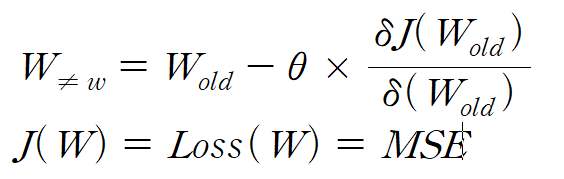

    \theta: 학습률

    J(w): 목적함수(objective function)

    Loss(w): 손실함수(loss function) or 비용함수(cost function) (MSE가 일반적으로 사용됨)

###**경사 하강법(gradient descent method)**
https://hi-guten-tag.tistory.com/205

함수의 기울기(경사)를 구하고 경사가 가장 낮은 방향으로 계속 이동시켜 극값에 이를 때까지 반복



왜 경사 하강법을 사용할까?

일반적으로 인공지능은 손실 함수를 통하여 자신의 파라미터를 검증
손실 함수는 인공지능의 파라미터를 통하여 나온 예측 값과 실제 값의 차이라고 볼 수 있으며,

특정 파라미터를 통하여 나온 손실 함수 값이 가장 낮은 곳이 바로 최적의 파라미터라고 할 수 있음

그냥 손실함수를 미분하여 최소, 최대 값을 찾으면 되지 않을까?


미분을 이용하지 않고 경사 하강법을 이용하여 최소의 근삿값을 찾는 이유가 있음

실제 마주치는 함수들은 간단한 함수가 아니라 복잡하고, 비선형적인 함수가 대부분

따라서 미분을 통하여 그 값을 계산하기 어려운 경우가 많음

또한 미분을 구현하는 과정보다 경사 하강법을 구현하여 최솟값을 찾는 것이 실질적으로 더 효율적

따라서 함수를 미분하는 대신 경사 하강법을 이용하여 함수의 최소, 최댓값을 찾음

##과대적합을 해결해보자

**규제**

머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 않게 하는 것

모델이 훈련세트에 과대적합되지 않도록 함

선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만듬

규제 전 표준화

특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이가 나게 됨

일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것임

따라서 규제를 하기 전에 정규화를 해야함

2장에서는 평균과 표준편차를 직접 구해 특성을 표준점수로 바꿈

In [ ]:
maen = np.mean(train_input, axis=0) # 평균
std = np.std(train_input, axis=0) # 표준편차

train_scaled = (train_input - mean) / std # 표준점수로 변환

사이킷런에서 제공하는 StandardScaler 클래스를 사용

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**훈련 세트로 학습한 변환기를 사용하여 테스트 세트를 변환해야함**

###릿지 회귀


* 계수를 제곱한 값을 기준으로 규제를 적용
* 조금 더 선호됨
* 확률적 평균 경사 하강법(ㄴtochastic Average Gradiant Descent, SAGD) 사용
  * 훈련 데이터의 일부 미니배치만을 사용하여 모델 파라미터를 업데이트하는 방법
    * 배치(batch)는 모든 데이터를 의미
    * 미니배치(mini-batch)는 전체 훈련 데이터 중 일정 크기로 분할된 데이터들을 의미
  * 미니배치 경사 하강법과는 다르게 미니배치에서 계산된 기울기를 모두 저장하고 업데이트를 조금씩 적용
  * 모든 미니배치에서 계산된 기울기의 평균을 사용하여 업데이트
  * 즉, 한 에포크마다 업데이트가 적용된
    * 에포크(epoch)는 전체 훈련 데이터셋을 한 번 순회하는 것을 의미
  * 주의: 확률적 경사 하강법(Stochastic Gradiant Descent, SGD)과는 다름
    * 미니배치가 아닌 하나의 훈련 데이터를 사용함
  * 주의: 미니배치 경사 하강법(Mini-Batch Gradiant Descent)과는 다름
    * 전체 훈련 데이터셋을 작은 미니배치로 나누어 사용
    * 각 미니배치에 대한 기울기를 계산하고, 해당 미니배치에 대해 모델 파라미터를 업데이트
    * 업데이트가 미니배치마다 이루어지므로 업데이트 횟수는 전체 데이터셋을 나눈 미니배치의 수에 따라 결정
  * 특성과 샘플의 수가 많을 때 좋음


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


**규제 양 조절**

alpha 매개변수로 규제의 강도 조절

* alpha값이 크면 규제 강도가 세짐 -> 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
* alpha값이 작으면 규제 강도가 약해짐 -> 계수값을 덜 줄이고 조금 더 과대적합되도록 유도
* alpha값은 모델이 학습하는 값이 아니라 사람이 사전에 지정해야하는 값
  * 하이퍼파라미터(매개변수, 파라미터)

적절한 alpha값 찾기
* alpha값에 대한 R^2(결정계수, 3-1참조)값의 그래프 그려보기

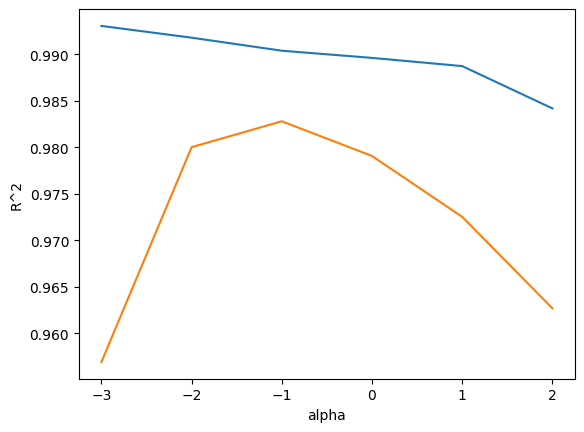

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score) # 로그스케일
plt.plot(np.log10(alpha_list), test_score)  # alpha값을 0.001부터 10배씩 늘렸기 때문에 list에 있는 6개의 값을 동일한 간격으로 나타내기 위해
plt.xlabel('alpha')                         # 로그함수로 바꾸어 지수로 표현
plt.ylabel('R^2')
plt.show()

위는 훈련 세트 그래프, 아래는 테스트 세트 그래프

적절한 alpha값은 -1, 즉 10^-1=0.1

alpha값을 0.1로 하여 최종 모델 훈련

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


##라쏘 회귀

Ridge 클래스를 Lasso 클래스로 바꿔서 훈련

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000) #max_iter=10000)반복횟수
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


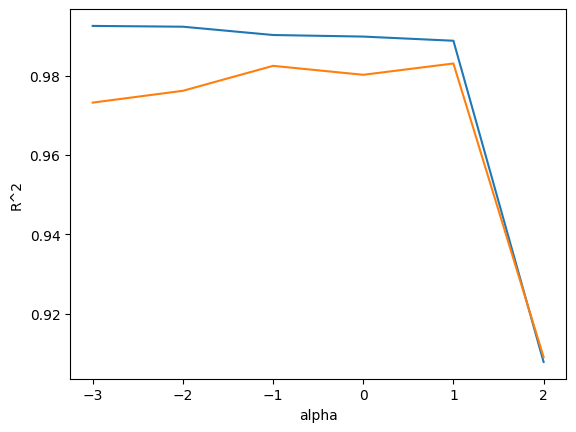

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha값은 1. 즉 10^1=10
alpha값은 10일때 가장 적절

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델은 계수 값을 아예 0으로 만들 수 있음

라쏘 모델의 계수는 **coef_속성**에 저장

**np.sum()**함수는 배열을 모두 더한 값을 반환

넘파이 배열에 비교 연산자를 사용했을 때 각 원소는 True(1) 또는 False(0)

1과 0으로 인식하여 덧셈(원소 개수를 헤아리는 효과)

In [ ]:
print(np.sum(lasso.coef_ == 0))

40
